In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

from rankeval.analysis.topological import topological_analysis
from rankeval.core.model import RTEnsemble

In [3]:
model_file = "/Users/claudio/docs/LAVORO/coding/ltr/QuickScorer/debug_data/model.lmart.msn1.xml"
model = RTEnsemble(model_file, name="lmart.100T")

In [4]:
model_stats = topological_analysis(model, include_leaves=False)

[0 1 3 ..., 0 0 0]


In [5]:
model_stats.describe_height_trees()

DescribeResult(nobs=100, minmax=(5, 9), mean=8.5099999999999998, variance=0.83828282828282807, skewness=-1.8152708328151126, kurtosis=2.4112297576244286)

In [6]:
model_stats.fullness_per_level()

array([ 1.        ,  0.53      ,  0.2625    ,  0.226     ,  0.13875   ,
        0.08916667,  0.05263158,  0.03863636,  0.0292    ])

In [7]:
node_freqs = model_stats.fraction_of_trees_per_node()

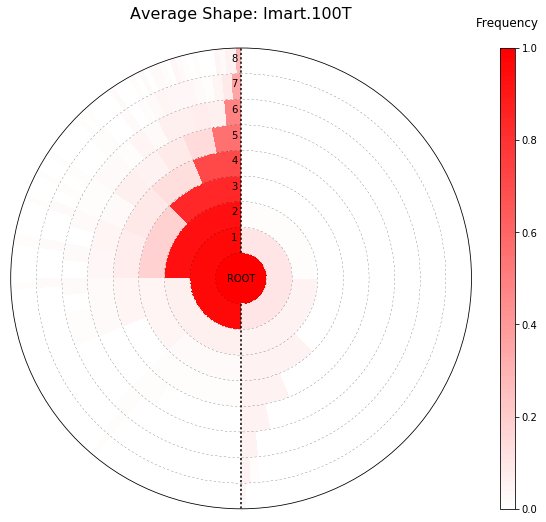

In [93]:
max_levels, _ = node_freqs.shape
max_nodes = 2**max_levels

# custom color map
cm = LinearSegmentedColormap.from_list('w2r', [(1,1,1),(1,0,0)], N=100)

#fig, ax = plt.subplots(ncols=1, subplot_kw=dict(projection='polar'), figsize=(10,10))
fig = plt.figure(figsize=(8,8))
cax = fig.add_axes([0.85, 0.1, 0.025, 0.8]) # axes for the colot bar
ax = fig.add_axes([0.0, 0.1, 0.8, 0.8], projection='polar') # axes for the plot
ax.set_theta_zero_location("N")

theta, r = np.mgrid[0:2*np.pi:(max_nodes+1)*1j, 0:1:(max_levels+1)*1j]
z = np.zeros(theta.size).reshape(theta.shape)

for level in xrange(max_levels):
    num_nodes = 2**level
    num_same_color = max_nodes/num_nodes
    for node in xrange(num_nodes):
        if node<node_freqs.shape[1]:
            z[ num_same_color*node:num_same_color*(node+1), level ] = node_freqs[level, node]

# draw the tree nodes frequencies
h = ax.pcolormesh(theta, r, z, cmap=cm, vmin=0., vmax=1.)

# draw the colobar
cbar = fig.colorbar(h, cax=cax)
cax.set_title('Frequency\n')

# separate depths
for level in xrange(1,max_levels):
    ax.plot( np.linspace(0,2*np.pi,num=128), [1./max_levels*level]*128, 'k:', lw=0.2)

# separate left sub-tree from right sub-tree
ax.plot( [np.pi,np.pi], [1./max_levels,1], 'k:')
ax.plot( [0,0], [1./max_levels,1], 'k:')

# no labels on x axis label 
ax.set_xticks([])
# label tree depths
ax.yaxis.labelpad = 20
ax.set_yticks(np.arange(1./max_levels,1,1./max_levels))
trans_offset = mtrans.offset_copy(ax.transData, fig=fig, x=-10, y=10, units='dots')
ax.set_yticklabels([str(l) for l in range(1,max_levels)], transform = trans_offset)
ax.text(0,0, "ROOT", horizontalalignment='center', verticalalignment='center')

ax.set_title("Average Shape: " + str(model), fontsize=16)

plt.show()

# only half

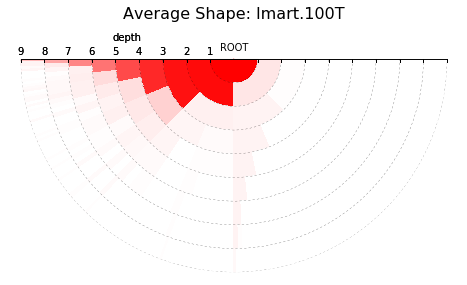

In [89]:
from matplotlib.transforms import Affine2D

import mpl_toolkits.axisartist.floating_axes as floating_axes

import numpy as np
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)

fig = plt.figure(1, figsize=(8, 4))

#ax3, ax = setup_axes3(fig,111)
tr = Affine2D().translate(np.pi, 0) + PolarAxes.PolarTransform()
grid_locator2 = FixedLocator( [x+1. for x in range(max_levels)] )
grid_helper = floating_axes.GridHelperCurveLinear(tr, extremes=(0, np.pi, 0, max_levels) ,
                                                 grid_locator2=grid_locator2)
ax3 = floating_axes.FloatingSubplot(fig, 111, grid_helper=grid_helper)
fig.add_axes(ax3)

ax3.axis["bottom"].set_visible(False)
ax3.axis["top"].set_visible(False)

ax3.axis["right"].set_axis_direction("top")
ax3.axis["left"].set_axis_direction("bottom")
ax3.axis["left"].major_ticklabels.set_pad(-5)
ax3.axis["left"].major_ticklabels.set_rotation(180)
ax3.axis["left"].label.set_text("depth")
ax3.axis["left"].label.set_rotation(180)
ax3.axis["left"].label.set_pad(20)

ax = ax3.get_aux_axes(tr)
ax.patch = ax3.patch # for aux_ax to have a clip path as in ax
ax3.patch.zorder=.9 # but this has a side effect that the patch is
                    # drawn twice, and possibly over some other
                    # artists. So, we decrease the zorder a bit to
                    # prevent this.


theta, r = np.mgrid[0:np.pi:(max_nodes+1)*1j, 0:max_levels+1]
z = np.zeros(theta.size).reshape(theta.shape)

for level in xrange(max_levels):
    num_nodes = 2**level
    num_same_color = max_nodes/num_nodes
    for node in xrange(num_nodes):
        if node<node_freqs.shape[1]:
            z[ num_same_color*node:num_same_color*(node+1), level ] = node_freqs[level, node]

# draw the tree nodes frequencies
h = ax.pcolormesh(theta, r, z, cmap=cm, vmin=0., vmax=1.)

# separate depths
for level in xrange(1,max_levels+1):
    ax.plot( np.linspace(0,np.pi,num=128), [1*level]*128, 'k:', lw=0.2)

# separate left sub-tree from right sub-tree
ax.plot( [np.pi,np.pi], [0,1], 'k-')
ax.plot( [0,0], [0,1], 'k-')

# label tree depths
ax.text(np.pi/2*3,.5, "ROOT", horizontalalignment='center', verticalalignment='center')

ax3.set_title("Average Shape: " + str(model), fontsize=16, y=1.15)

plt.show()